In [ ]:
!pip install yfinance

In [ ]:
!pip install pycodestyle pycodestyle_magic
!pip install flake8
%load_ext pycodestyle_magic

# correlation analysis

In [12]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
# %%pycodestyle

def get_bitcoin_candlestick(start_date, end_date):

    """  get bitcoin daily info from yahooFinance and remove non values"""

    btc_df = yf.download("BTC-USD", start_date, end_date,
                         auto_adjust=True)

    btc_df['btc_daily_return'] = (btc_df['Close'] -
                                  btc_df['Open']) / btc_df['Open']

    btc_df = btc_df.dropna()

    return btc_df


def get_gold_candlestick(start_date, end_date):

    """ get gold daily prices and calculate daily return """

    gold_df = yf.download('GLD', start_date, end_date, auto_adjust=True)

    gold_df['gold_daily_return'] = (gold_df['Close'] -
                                    gold_df['Open']) / gold_df['Open']

    gold_df = gold_df.dropna()

    # Plot the closing price of GLD
    gold_df.Close.plot(figsize=(10, 7), color='r')
    plt.ylabel("Gold ETF Prices")
    plt.title("Gold ETF Price Series")
    plt.show()

    return gold_df


def get_crude_oil_candlestick(start_date, end_date):

    """ get crude oil daily prices and calculate daily return """

    oil_df = yf.download('CL=F', start_date, end_date, auto_adjust=True)

    oil_df['oil_daily_return'] = (oil_df['Close'] -
                                  oil_df['Open']) / oil_df['Open']

    oil_df = oil_df.dropna()

    # Plot the closing price of crude oil
    oil_df.Close.plot(figsize=(10, 7), color='r')
    plt.ylabel("Crude oil Prices")
    plt.title("Crude oil Price Series")
    plt.show()

    return oil_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


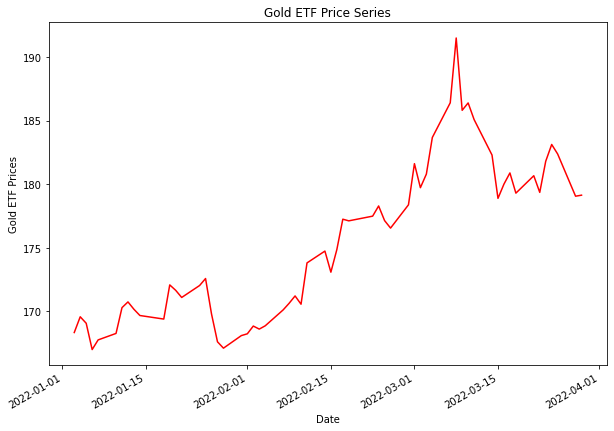

[*********************100%***********************]  1 of 1 completed


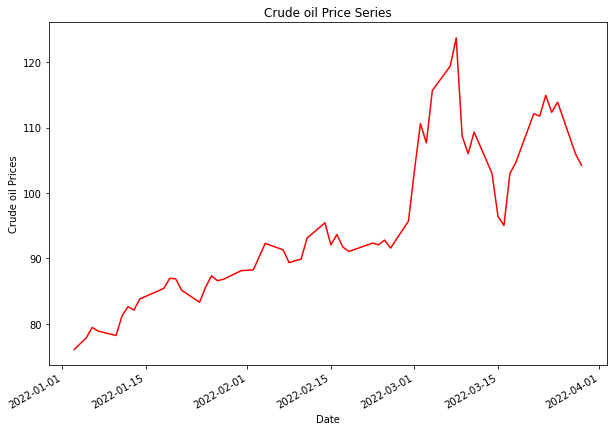

In [37]:

btc_df = get_bitcoin_candlestick(start_date="2022-01-01",
                                 end_date="2022-03-30")
gold_df = get_gold_candlestick(start_date="2022-01-01",
                               end_date="2022-03-30")
oil_df = get_crude_oil_candlestick(start_date="2022-01-01",
                                   end_date="2022-03-30")

## **correlation analysis**

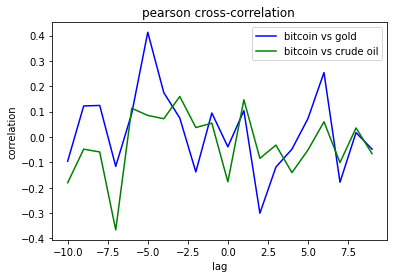

In [46]:

def crosscorr(datax, datay, lag=0, method="pearson"):
    """ Lag-N cross correlation. """

    return datax.corr(datay.shift(lag), method=method)


def check_correlation_lags(pos_lag, neg_lag, corr_method):

    btc_returns = btc_df['btc_daily_return']
    oil_returns = oil_df['oil_daily_return']
    gold_returns = gold_df['gold_daily_return']

    df = pd.merge(btc_returns, oil_returns, left_index=True, right_index=True)
    df = pd.merge(df, gold_returns, left_index=True, right_index=True)

    gold_cov = [crosscorr(df['btc_daily_return'], df['gold_daily_return'],
                          lag=i, method=corr_method) for i in range(-neg_lag, pos_lag)]
    oil_cov = [crosscorr(df['btc_daily_return'], df['oil_daily_return'],
                         lag=i, method=corr_method) for i in range(-neg_lag, pos_lag)]

    plt.plot(range(-neg_lag, pos_lag), gold_cov, color='blue',
             label="bitcoin vs gold")
    plt.plot(range(-neg_lag, pos_lag), oil_cov, color='green',
             label='bitcoin vs crude oil')
    plt.title(corr_method + " cross-correlation ")
    plt.xlabel("lag")
    plt.ylabel("correlation")
    plt.legend()
    plt.show()


check_correlation_lags(pos_lag=10, neg_lag=10, corr_method="pearson")

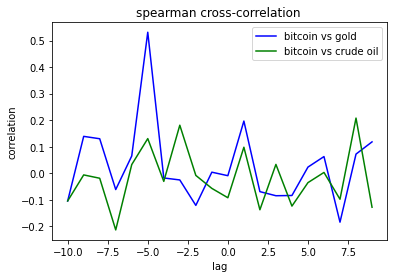

In [47]:
check_correlation_lags(pos_lag=10, neg_lag=10, corr_method="spearman")